In [177]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import zipfile

import os
from sklearn.model_selection import train_test_split 

for dirname, _, filenames in os.walk('vehicle_price(2020) data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [178]:
df = pd.read_csv('vehicle_price(2020) data.csv')
print(f'data shape is {df.shape}')
df.head(5)

data shape is (22867, 9)


,brand,model,year,body,price$,car_mileage,fuel,power,transmission
0,ford,transit,2006,other,5 350,220,diesel,2.0,manual
1,renault,master,2017,other,17 000,211,diesel,2.3,manual
2,opel,vivaro,2015,other,15 200,157,diesel,1.6,manual
3,ford,transit,2000,other,4 999,300,diesel,2.4,manual
4,mercedes-benz,sprinter,2010,other,20 700,682,diesel,3.0,automatic


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22867 entries, 0 to 22866
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         22867 non-null  object 
 1   model         22867 non-null  object 
 2   year          22867 non-null  int64  
 3   body          22867 non-null  object 
 4   price$        22867 non-null  object 
 5   car_mileage   22867 non-null  int64  
 6   fuel          21140 non-null  object 
 7   power         21464 non-null  float64
 8   transmission  22593 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1.6+ MB


In [180]:
df.isnull().sum()

brand              0
model              0
year               0
body               0
price$             0
car_mileage        0
fuel            1727
power           1403
transmission     274
dtype: int64

In [181]:
#We replace Nan values in transmission columns to 'other'
vehicle_df1 = df.copy()
vehicle_df1['transmission'] = vehicle_df1['transmission'].fillna('other')
vehicle_df1.isnull().sum()


brand              0
model              0
year               0
body               0
price$             0
car_mileage        0
fuel            1727
power           1403
transmission       0
dtype: int64

In [182]:
#let's care about missing power values
from sklearn.impute import SimpleImputer
vehicle_df2 = vehicle_df1.copy()
imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
vehicle_df2[['power']] = imputer_mean.fit_transform(vehicle_df2[['power']]).round()
vehicle_df2.isnull().sum()

brand              0
model              0
year               0
body               0
price$             0
car_mileage        0
fuel            1727
power              0
transmission       0
dtype: int64

In [183]:
#let's care about missing fuel values
vehicle_df3 = vehicle_df2.copy()
imputer_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
vehicle_df3[['fuel']] = imputer_freq.fit_transform(vehicle_df3[['fuel']])
vehicle_df3.isnull().sum()

brand           0
model           0
year            0
body            0
price$          0
car_mileage     0
fuel            0
power           0
transmission    0
dtype: int64

In [184]:
vehicle_df3.dtypes

brand            object
model            object
year              int64
body             object
price$           object
car_mileage       int64
fuel             object
power           float64
transmission     object
dtype: object

In [185]:
#let's make price numeric
vehicle_df3['price$'].describe

<bound method NDFrame.describe of 0          5 350
1         17 000
2         15 200
3          4 999
4         20 700
          ...   
22862      6 500
22863      9 300
22864    105 000
22865      9 300
22866      9 650
Name: price$, Length: 22867, dtype: object>

In [186]:
vehicle_df3['price$'] = vehicle_df3['price$'].map(lambda x: x.replace(' ', '').replace('договірна', '0')).astype('int32')

In [187]:
vehicle_df3 = vehicle_df3.drop(index=[6061,8590,18925], axis=1)
pd.to_numeric(vehicle_df3['price$'])

0          5350
1         17000
2         15200
3          4999
4         20700
          ...  
22862      6500
22863      9300
22864    105000
22865      9300
22866      9650
Name: price$, Length: 22864, dtype: int32

In [188]:
vehicle_df3.dtypes

brand            object
model            object
year              int64
body             object
price$            int32
car_mileage       int64
fuel             object
power           float64
transmission     object
dtype: object

In [189]:
vehicle_df3.describe()

,year,price$,car_mileage,power
count,22864.000000,22864.000000,22864.000000,22864.000000
mean,2009.453595,14651.603394,215.195460,2.166900
std,6.209393,21212.127182,3273.831217,0.932229
min,1948.000000,100.000000,0.000000,0.000000
25%,2007.000000,6300.000000,90.000000,2.000000
50%,2010.000000,9600.000000,154.500000,2.000000
75%,2014.000000,15400.000000,205.000000,2.000000
max,2020.000000,665000.000000,339000.000000,35.000000


In [190]:
#We see that in average car was produced in 2009, it's price 14651$, mileage is 215 miles, power is 2.16l 

In [191]:
vehicle_df3.columns

Index(['brand', 'model', 'year', 'body', 'price$', 'car_mileage', 'fuel',
       'power', 'transmission'],
      dtype='object')

In [192]:
vehicle_df3.columns = ['brand', 'model', 'year', 'body', 'price', 'car_mileage', 'fuel',
       'power', 'transmission']

In [193]:
#let's drop rows where price > 100000 and price < 1000 and where price=0

vehicle_df3 = vehicle_df3.drop(vehicle_df3[vehicle_df3.price < 1000].index)
vehicle_df3 = vehicle_df3.drop(vehicle_df3[vehicle_df3.price > 100000].index)
vehicle_df3 = vehicle_df3.drop(vehicle_df3[vehicle_df3.price == 0].index)
vehicle_df3.describe()

,year,price,car_mileage,power
count,22570.000000,22570.000000,22570.000000,22570.000000
mean,2009.445813,13156.482942,214.690518,2.150731
std,6.048134,12198.074961,3276.793151,0.909996
min,1948.000000,1000.000000,0.000000,0.000000
25%,2007.000000,6300.000000,91.000000,2.000000
50%,2010.000000,9550.000000,155.000000,2.000000
75%,2014.000000,15000.000000,205.750000,2.000000
max,2020.000000,100000.000000,339000.000000,35.000000


In [194]:
#outliers
def outliers(vehicle_df3):
    num_var = list(vehicle_df3._get_numeric_data().columns)
    for col_names in num_var:
        vehicle_df3[col_names] = vehicle_df3[col_names].apply(lambda y: vehicle_df3[col_names].mean()-3*vehicle_df3[col_names].std() 
                            if y < vehicle_df3[col_names].mean()-3*vehicle_df3[col_names].std() else y)
        vehicle_df3[col_names] = vehicle_df3[col_names].apply(lambda y: vehicle_df3[col_names].mean()+3*vehicle_df3[col_names].std() 
                            if y > vehicle_df3[col_names].mean()+3*vehicle_df3[col_names].std() else y)
    return(vehicle_df3)

In [195]:
vehicle_df3 = outliers(vehicle_df3)
df.describe()

,year,car_mileage,power
count,22867.000000,22867.000000,21464.000000
mean,2009.451918,215.176193,2.125814
std,6.215080,3273.616921,0.945958
min,1948.000000,0.000000,0.100000
25%,2007.000000,90.000000,1.600000
50%,2010.000000,154.000000,2.000000
75%,2014.000000,205.000000,2.400000
max,2020.000000,339000.000000,35.000000


In [196]:
vehicle_df3.shape

(22570, 9)

In [197]:
vehicle_df3['transmission'].nunique()

5

In [198]:
for col in vehicle_df3:
    print(vehicle_df3['transmission'].unique())

['manual' 'automatic' 'other' 'typtronik' 'adaptive']
['manual' 'automatic' 'other' 'typtronik' 'adaptive']
['manual' 'automatic' 'other' 'typtronik' 'adaptive']
['manual' 'automatic' 'other' 'typtronik' 'adaptive']
['manual' 'automatic' 'other' 'typtronik' 'adaptive']
['manual' 'automatic' 'other' 'typtronik' 'adaptive']
['manual' 'automatic' 'other' 'typtronik' 'adaptive']
['manual' 'automatic' 'other' 'typtronik' 'adaptive']
['manual' 'automatic' 'other' 'typtronik' 'adaptive']


In [199]:
vehicle_df3 = vehicle_df3.dropna()

In [200]:
#encoding transmission
from sklearn import preprocessing
vehicle_df4 = vehicle_df3.copy()
vehicle_df4['transmission'] = preprocessing.LabelEncoder().fit_transform(vehicle_df4['transmission'])
vehicle_df4.head(5)

,brand,model,year,body,price,car_mileage,fuel,power,transmission
0,ford,transit,2006.0,other,5350.0,220.0,diesel,2.0,2
1,renault,master,2017.0,other,17000.0,211.0,diesel,2.0,2
2,opel,vivaro,2015.0,other,15200.0,157.0,diesel,2.0,2
3,ford,transit,2000.0,other,4999.0,300.0,diesel,2.0,2
4,mercedes-benz,sprinter,2010.0,other,20700.0,682.0,diesel,3.0,1


In [201]:
vehicle_df4['fuel'].nunique()

3

In [202]:
for col in vehicle_df4:
    print(vehicle_df4['fuel'].unique())

['diesel' 'petrol' 'gas']
['diesel' 'petrol' 'gas']
['diesel' 'petrol' 'gas']
['diesel' 'petrol' 'gas']
['diesel' 'petrol' 'gas']
['diesel' 'petrol' 'gas']
['diesel' 'petrol' 'gas']
['diesel' 'petrol' 'gas']
['diesel' 'petrol' 'gas']


In [203]:
#encoding fuel
from sklearn import preprocessing
vehicle_df5 = vehicle_df4.copy()
vehicle_df5['fuel'] = preprocessing.LabelEncoder().fit_transform(vehicle_df5['fuel'])
vehicle_df5.head(5)

,brand,model,year,body,price,car_mileage,fuel,power,transmission
0,ford,transit,2006.0,other,5350.0,220.0,0,2.0,2
1,renault,master,2017.0,other,17000.0,211.0,0,2.0,2
2,opel,vivaro,2015.0,other,15200.0,157.0,0,2.0,2
3,ford,transit,2000.0,other,4999.0,300.0,0,2.0,2
4,mercedes-benz,sprinter,2010.0,other,20700.0,682.0,0,3.0,1


In [204]:
vehicle_df5['body'].nunique()

12

In [205]:
for col in vehicle_df5:
    print(vehicle_df5['body'].unique())

['other' 'sedan' 'coupe' 'minivan' 'station wagon' 'SUV/crossover'
 'cabriolet' 'passenger van' 'limousine' 'pickup' 'hatchback' 'liftback']
['other' 'sedan' 'coupe' 'minivan' 'station wagon' 'SUV/crossover'
 'cabriolet' 'passenger van' 'limousine' 'pickup' 'hatchback' 'liftback']
['other' 'sedan' 'coupe' 'minivan' 'station wagon' 'SUV/crossover'
 'cabriolet' 'passenger van' 'limousine' 'pickup' 'hatchback' 'liftback']
['other' 'sedan' 'coupe' 'minivan' 'station wagon' 'SUV/crossover'
 'cabriolet' 'passenger van' 'limousine' 'pickup' 'hatchback' 'liftback']
['other' 'sedan' 'coupe' 'minivan' 'station wagon' 'SUV/crossover'
 'cabriolet' 'passenger van' 'limousine' 'pickup' 'hatchback' 'liftback']
['other' 'sedan' 'coupe' 'minivan' 'station wagon' 'SUV/crossover'
 'cabriolet' 'passenger van' 'limousine' 'pickup' 'hatchback' 'liftback']
['other' 'sedan' 'coupe' 'minivan' 'station wagon' 'SUV/crossover'
 'cabriolet' 'passenger van' 'limousine' 'pickup' 'hatchback' 'liftback']
['other' 'sed

In [206]:
#encoding body
from sklearn import preprocessing
vehicle_df6 = vehicle_df5.copy()
vehicle_df6['body'] = preprocessing.LabelEncoder().fit_transform(vehicle_df6['body'])
vehicle_df6.head(5)

,brand,model,year,body,price,car_mileage,fuel,power,transmission
0,ford,transit,2006.0,7,5350.0,220.0,0,2.0,2
1,renault,master,2017.0,7,17000.0,211.0,0,2.0,2
2,opel,vivaro,2015.0,7,15200.0,157.0,0,2.0,2
3,ford,transit,2000.0,7,4999.0,300.0,0,2.0,2
4,mercedes-benz,sprinter,2010.0,7,20700.0,682.0,0,3.0,1


In [207]:
brand_count = vehicle_df6['brand'].value_counts(ascending=False)

In [208]:
brand_count_less_than_50 = brand_count[(brand_count < 50)]
brand_count_less_than_50

газ           48
jaguar        47
smart         33
cadillac      28
уаз           24
great         18
daihatsu      17
bentley       16
maserati      16
lincoln       15
buick         14
ravon         12
hummer        10
alfa          10
rover         10
byd            8
богдан         7
lada           7
gmc            6
saab           5
lancia         4
jac            4
samand         4
mg             4
lifan          4
isuzu          4
dadi           4
chana          3
луаз           3
iveco          3
иж             3
zx             2
faw            2
brilliance     2
changhe        2
sma            1
саморобний     1
shuanghuan     1
ретро          1
москвич        1
scion          1
fisker         1
mercury        1
saipa          1
tata           1
jonway         1
ds             1
proton         1
Name: brand, dtype: int64

In [209]:
vehicle_df6.brand = vehicle_df6.brand.apply(lambda x: 'other' if x in brand_count_less_than_50 else x)
len(vehicle_df6.brand.unique())

41

In [210]:
#encoding brand
from sklearn import preprocessing
vehicle_df7 = vehicle_df6.copy()
vehicle_df7['brand'] = preprocessing.LabelEncoder().fit_transform(vehicle_df7['brand'])
vehicle_df7.head(5)

,brand,model,year,body,price,car_mileage,fuel,power,transmission
0,11,transit,2006.0,7,5350.0,220.0,0,2.0,2
1,29,master,2017.0,7,17000.0,211.0,0,2.0,2
2,25,vivaro,2015.0,7,15200.0,157.0,0,2.0,2
3,11,transit,2000.0,7,4999.0,300.0,0,2.0,2
4,21,sprinter,2010.0,7,20700.0,682.0,0,3.0,1


In [211]:
#encoding model
from sklearn import preprocessing
vehicle_df8 = vehicle_df7.copy()
vehicle_df8['model'] = preprocessing.LabelEncoder().fit_transform(vehicle_df8['model'])
vehicle_df8.head(5)

,brand,model,year,body,price,car_mileage,fuel,power,transmission
0,11,816,2006.0,7,5350.0,220.0,0,2.0,2
1,29,564,2017.0,7,17000.0,211.0,0,2.0,2
2,25,852,2015.0,7,15200.0,157.0,0,2.0,2
3,11,816,2000.0,7,4999.0,300.0,0,2.0,2
4,21,762,2010.0,7,20700.0,682.0,0,3.0,1


In [212]:
vehicle_df8.dtypes

brand             int32
model             int32
year            float64
body              int32
price           float64
car_mileage     float64
fuel              int32
power           float64
transmission      int32
dtype: object

In [213]:
#visualization

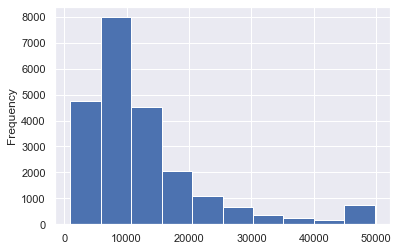

In [214]:
vehicle_df8['price'].plot(kind = 'hist')

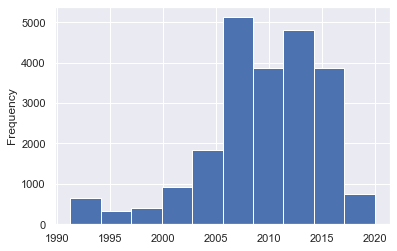

In [215]:
vehicle_df8['year'].plot(kind = 'hist')

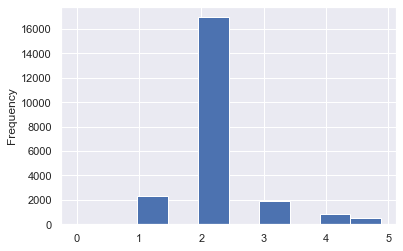

In [216]:
vehicle_df8['power'].plot(kind = 'hist')

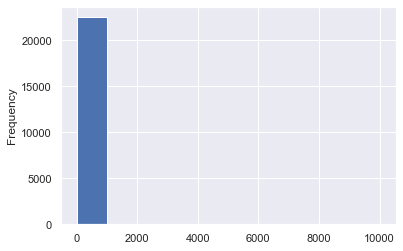

In [217]:
vehicle_df8['car_mileage'].plot(kind = 'hist')

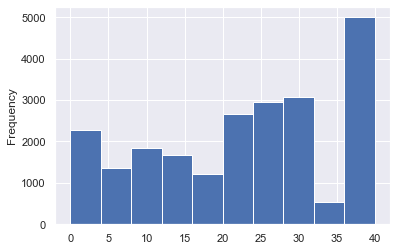

In [218]:
vehicle_df8['brand'].plot(kind = 'hist')

In [219]:
vehicle_df8.to_csv('prepared_data2.csv', sep=',', index=False)

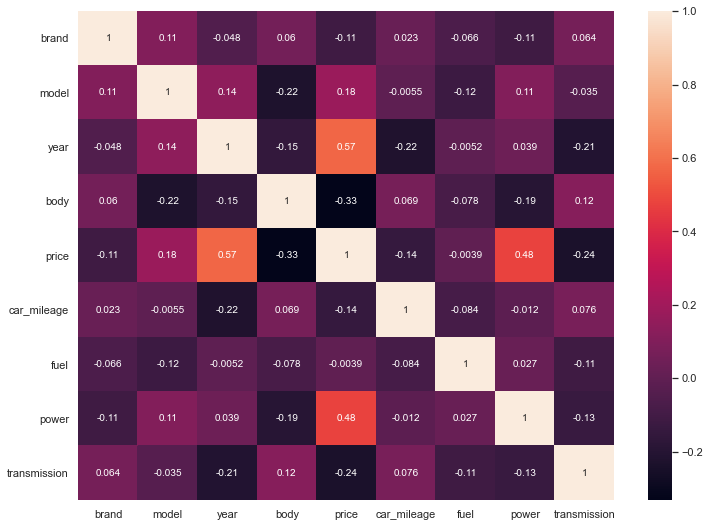

In [220]:
import seaborn as sns
corrmat = vehicle_df8.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

In [222]:
#We see that biggest correlation between price and year. In the next part of our work we'll build a one-factor model the dependence of price on the year

In [223]:
vehicle_df8.describe()

,brand,model,year,body,price,car_mileage,fuel,power,transmission
count,22570.000000,22570.000000,22570.000000,22570.000000,22570.000000,22570.000000,22570.000000,22570.000000,22570.000000
mean,22.168631,481.317856,2009.526572,6.353035,12695.436499,169.775606,0.917988,2.126871,1.685955
std,11.876758,236.486838,5.728246,4.327406,10062.735598,346.242848,0.909849,0.723421,0.749438
min,0.000000,0.000000,1991.301412,0.000000,1000.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,278.000000,2007.000000,3.000000,6300.000000,91.000000,0.000000,2.000000,1.000000
50%,24.000000,510.000000,2010.000000,8.000000,9550.000000,155.000000,1.000000,2.000000,2.000000
75%,31.000000,654.750000,2014.000000,10.000000,15000.000000,205.750000,2.000000,2.000000,2.000000
max,40.000000,895.000000,2020.000000,11.000000,49750.707825,10045.069971,2.000000,4.880718,4.000000
